Use the *freq* method to estimate a white dwarf age 
==========================================

In this tutotial we will estimate the age of two white dwarfs using the *freq* method in *wdwarfdate*. We will start by importing the packages we need.

In [1]:
import wdwarfdate  
import numpy as np
import time

Then we set up the effective temperatures and surface gravity that *wdwarfdate* needs to run. The values used in this tutorial are from Gentile Fusillo, N.P. et al. (2019).

In [2]:
#Define data for the white dwarf
teffs = np.array([19250,20250])
teffs_err = np.array([500,850])
loggs = np.array([8.16,8.526])
loggs_err = np.array([0.084,0.126])

Now we run the age estimation using the *freq* method and take the time it takes to run. We are going to explicitly indicate the models we wanted to use:

1) `model_wd = 'DA'`, for type of white dwarf

2) `model_ifmr = 'Cummings_2018_MIST'`, for the initial-to-final mass relation 

3) `feh = 'p0.00'` and `vvcrit='0.0'`, for the isochrone of the progenitor star

These are the default models so we do not need to do it in this case, but we will write them down to be clear. 
We will also specify the high and low percentiles we want to use to calculate the errors for each parameter. With the `data_type = 'Gyr'` parameters we will select the units of the resulting ages to be Gyr. Finally we will select `return_distributions = True` so we obtain the distributions for each of the resulting parameters.

In [16]:
start = time.time()
results = wdwarfdate.calc_wd_age(teffs,teffs_err,loggs,loggs_err,
                                 method='freq',
                                 model_wd='DA',feh='p0.00',vvcrit='0.0',
                                 model_ifmr = 'Cummings_2018_MIST', 
                                 high_perc = 84, low_perc = 16,
                                 datatype='Gyr',
                                 return_distributions=True)
end = time.time()
print('{}s'.format(end - start))

0.17765402793884277s


We can see that the *freq* method takes a few seconds to run two white dwarfs. Let's take a look to see how the results looks like:

In [7]:
results

final_mass_median,final_mass_err_high,final_mass_err_low,initial_mass_median,initial_mass_err_high,initial_mass_err_low,cooling_age_median,cooling_age_err_high,cooling_age_err_low,ms_age_median,ms_age_err_high,ms_age_err_low,total_age_median,total_age_err_high,total_age_err_low,final_mass_dist [2000],initial_mass_dist [2000],cooling_age_dist [2000],ms_age_dist [2000],total_age_dist [2000]
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.7163973003901498,0.05153986841255287,0.05245514185243971,2.842729668287711,0.279945272134003,0.6555396536896865,0.11002707057972488,0.02294892666018966,0.018382543105506355,0.5287901219454461,0.6113565681983166,0.11680421374540217,0.6419924834884124,0.5933178783292502,0.09752974118502034,0.7163948033950059 .. 0.6818727747011056,2.8424350424375744 .. 2.4109096837638204,0.11950746475942019 .. 0.11931739310438888,0.5289874286665552 .. 0.8679533204881368,0.6484948934259754 .. 0.9872707135925256
0.9478166648230173,0.07614923879346436,0.07982336928833389,4.456230512364648,0.7116751289108807,0.7460127970872321,0.20118654000756844,0.06517692944237649,0.0523077128311048,0.1544485312712643,0.09648521738553811,0.04769965696457487,0.3747492595287114,0.04905734822722585,0.03333859052412064,0.9194233875286277 .. 1.0415218718480528,4.190872780641381 .. 5.331980110729465,0.15499944945459251 .. 0.2343798448373513,0.18110078772722435 .. 0.09906243046970002,0.33610023718181686 .. 0.3334422753070513


As we selected `return_distributions = True`, last the five columns are the distributions of the parameters, and we will use the `wdwarfdate.plot_distributions()` function to plot them. If we use the parameter name to give the file a name, we can save the figure as name_distributions.png, but we won't do that now, we just want it displayed. We need to make sure to select the same `data_type='Gyr'` we used to calculate the distributions and it is recommended to use the same high and low percentiles.

teff:19250, logg:8.16


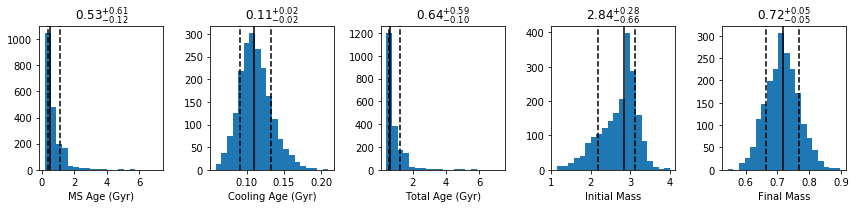

In [11]:
print('teff:{}, logg:{}'.format(teffs[0],loggs[0]))
distributions0 = results['ms_age_dist','cooling_age_dist','total_age_dist','initial_mass_dist','final_mass_dist'][0]
wdwarfdate.plot_distributions(*distributions,datatype='Gyr',high_perc=84,low_perc=16)

teff:20250, logg:8.526


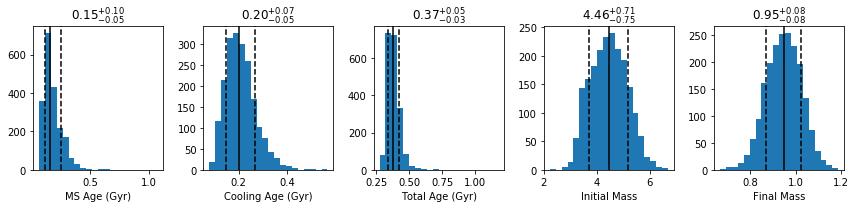

In [12]:
print('teff:{}, logg:{}'.format(teffs[1],loggs[1]))
distributions1 = results['ms_age_dist','cooling_age_dist','total_age_dist','initial_mass_dist','final_mass_dist'][1]
wdwarfdate.plot_distributions(*distributions1,datatype='Gyr',high_perc=84,low_perc=16)